### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
import sklearn.naive_bayes as naive_bayes
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.svm as svm 
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
import nltk
import string
import re 

In [2]:
#nltk.download('stopwords') 
#nltk.download('wordnet') 

### Reading Data

In [3]:
train_data = pd.read_csv("C:/Users/saira/Desktop/B-Tech/projects/AskReddit-main/AskReddit-Dataset/train.csv")
test_data = pd.read_csv("C:/Users/saira/Desktop/B-Tech/projects/AskReddit-main/AskReddit-Dataset/test.csv")

### EDA

In [4]:
train_data.head()

,qid,question_text,target
0,a3dee568776c08512c89,What is the role of Lua in Civ4?,0
1,bdb84f519e7b46e7b7bb,What are important chapters in Kannada for 10 ...,0
2,29c88db470e2eb5c97ad,Do musicians get royalties from YouTube?,0
3,3387d99bf2c3227ae8f1,What is the difference between Scaling Social ...,0
4,e79fa5038f765d0f2e7e,Why do elevators go super slow right before th...,0


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653061 entries, 0 to 653060
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   qid            653061 non-null  object
 1   question_text  653061 non-null  object
 2   target         653061 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 14.9+ MB


In [6]:
train_data.shape

(653061, 3)

In [7]:
test_data.shape

(653061, 2)

In [8]:
train_data.isna().sum() 

qid              0
question_text    0
target           0
dtype: int64

In [9]:
(train_data == "?").sum() 

qid              0
question_text    0
target           0
dtype: int64

In [10]:
train_data.duplicated().sum()

0

In [11]:
train_data['target'].value_counts()

0    612656
1     40405
Name: target, dtype: int64

<Axes: ylabel='count'>

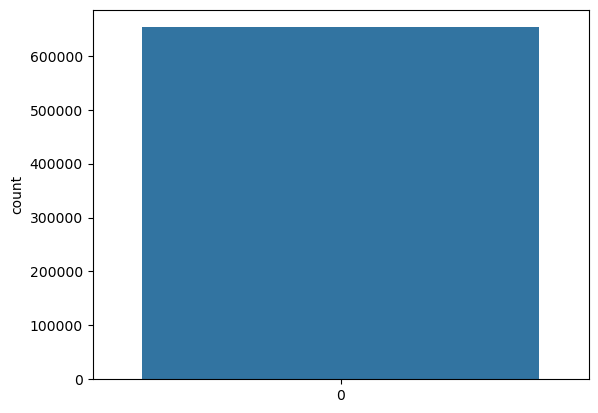

In [12]:
sns.countplot(train_data['target']) 

In [13]:
test_data.isna().sum()

qid              0
question_text    0
dtype: int64

In [14]:
(test_data == "?").sum() 

qid              0
question_text    0
dtype: int64

In [15]:
test_data.duplicated().sum()

0

In [16]:
main_data = train_data.append(test_data) 

C:\Users\saira\AppData\Local\Temp\ipykernel_19412\3971377198.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  main_data = train_data.append(test_data)


In [17]:
count_vectorizer = CountVectorizer(ngram_range=(1,4)) 
final_data = count_vectorizer.fit_transform(main_data['question_text'])

In [24]:
questions = final_data[:653061,:]
final_test_data  = final_data[653061:,:]

<1306122x20650674 sparse matrix of type '<class 'numpy.int64'>'
	with 55138457 stored elements in Compressed Sparse Row format>

In [25]:
targets = train_data['target'].to_numpy()
targets

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
train_X, test_X, train_y, test_y = train_test_split(questions, targets, test_size=0.2, random_state=40, stratify=targets) 

##  Model Fitting

In [27]:
model = LogisticRegression(C=0.77, class_weight= {0:0.25,1:1}, solver = 'liblinear', max_iter=10000, penalty = 'l1')

In [28]:
model.fit(train_X, train_y) 

LogisticRegression(C=0.77, class_weight={0: 0.25, 1: 1}, max_iter=10000,
                   penalty='l1', solver='liblinear')

In [29]:
train_yhat = model.predict(train_X)
test_yhat = model.predict(test_X) 

In [30]:
metrics.f1_score(train_y, train_yhat)

0.7001221638093145

In [31]:
metrics.f1_score(test_y, test_yhat)

0.6307546008838172

##  Final fit

In [32]:
model.fit(questions, train_data['target'])

LogisticRegression(C=0.77, class_weight={0: 0.25, 1: 1}, max_iter=10000,
                   penalty='l1', solver='liblinear')

In [34]:
yhat = model.predict(final_test_data)
test_data["target"] = yhat 
to_submit = test_data[["qid", "target"]]
to_submit.to_csv("project_submission.csv", index=False) 

In [35]:
np.unique(yhat,return_counts=True)

(array([0, 1], dtype=int64), array([603438,  49623], dtype=int64))

In [36]:
vocab = count_vectorizer.vocabulary_
vocab

{'what': 19169028,
 'is': 9133898,
 'the': 16515621,
 'role': 14569760,
 'of': 12042983,
 'lua': 10535676,
 'in': 8492555,
 'civ4': 3683178,
 'what is': 19265970,
 'is the': 9424711,
 'the role': 17038319,
 'role of': 14571979,
 'of lua': 12240019,
 'lua in': 10535680,
 'in civ4': 8545566,
 'what is the': 19303607,
 'is the role': 9466416,
 'the role of': 17038406,
 'role of lua': 14572950,
 'of lua in': 12240020,
 'lua in civ4': 10535681,
 'what is the role': 19308581,
 'is the role of': 9466430,
 'the role of lua': 17038802,
 'role of lua in': 14572951,
 'of lua in civ4': 12240021,
 'are': 1457067,
 'important': 8469143,
 'chapters': 3527303,
 'kannada': 9868017,
 'for': 6364346,
 '10': 6485,
 'icse': 8264662,
 '2018': 106141,
 'what are': 19174646,
 'are important': 1519373,
 'important chapters': 8470127,
 'chapters in': 3527503,
 'in kannada': 8628773,
 'kannada for': 9868151,
 'for 10': 6364388,
 '10 icse': 11058,
 'icse 2018': 8264743,
 'what are important': 19180426,
 'are impo

In [55]:
count_vectorizer1 = CountVectorizer(ngram_range=(1,4), vocabulary=vocab) 
dynamic_data = count_vectorizer1.fit_transform(["you are an atheist and blaming god after back breakage?"])

In [56]:
d_hat = model.predict(dynamic_data)
d_hat

array([1], dtype=int64)